# 라이브러리 및 데이터 불러오기

In [59]:
import pandas as pd
from scipy.cluster import hierarchy as hc
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

In [60]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 150

In [61]:
df = pd.read_csv("./data/preprocessed_country.csv")

In [62]:
df.set_index("country", inplace = True)

In [63]:
df

,child_mort,income,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude,exports,health,imports
country,,,,,,,,,,,,,
Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,Southern Asia,Asia,33.939110,67.709953,55.30,41.9174,248.297
Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,Europe,41.153332,20.168331,1145.20,267.8950,1987.740
Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,Africa,28.033886,1.659626,1712.64,185.9820,1400.440
Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Africa,-11.202692,17.873887,2199.19,100.6050,1514.370
Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,Caribbean,North America,17.060816,-61.796428,5551.00,735.6600,7185.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,2950.0,2.62,63.0,3.50,2970.0,Melanesia,Oceania,-15.376706,166.959158,1384.02,155.9250,1565.190
Venezuela,17.1,16500.0,45.90,75.4,2.47,13500.0,South America,South America,6.423750,-66.589730,3847.50,662.8500,2376.000
Vietnam,23.3,4490.0,12.10,73.1,1.95,1310.0,South-eastern Asia,Asia,14.058324,108.277199,943.20,89.6040,1050.620


In [64]:
# 정규화를 위한 스케일링 진행

standard_scaler = StandardScaler()
target = ["child_mort", "income", "inflation", "life_expec", "total_fer", "gdpp", "exports", "health", "imports"]

scaled_df = df[target]
scaled_df[target] = standard_scaler.fit_transform(scaled_df[target])

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1493/2205302240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[target] = standard_scaler.fit_transform(scaled_df[target])


In [65]:
scaled_df

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
country,,,,,,,,,
Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.411011,-0.565040,-0.432276
Albania,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.439218,-0.313677
Algeria,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.484826,-0.353720
Angola,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.291375,-0.532363,-0.345953
Antigua and Barbuda,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,-0.178771,0.040735
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,-0.336864,-0.501562,-0.342488
Venezuela,-0.526514,-0.033542,3.616865,0.546361,-0.316678,0.029323,-0.199393,-0.219310,-0.287205
Vietnam,-0.372315,-0.658404,0.409732,0.286958,-0.661206,-0.637754,-0.361463,-0.538488,-0.377572


# Hierarchy Clustering

In [127]:
sampled_df = scaled_df.sample(50)
X = sampled_df[["child_mort", "total_fer"]]

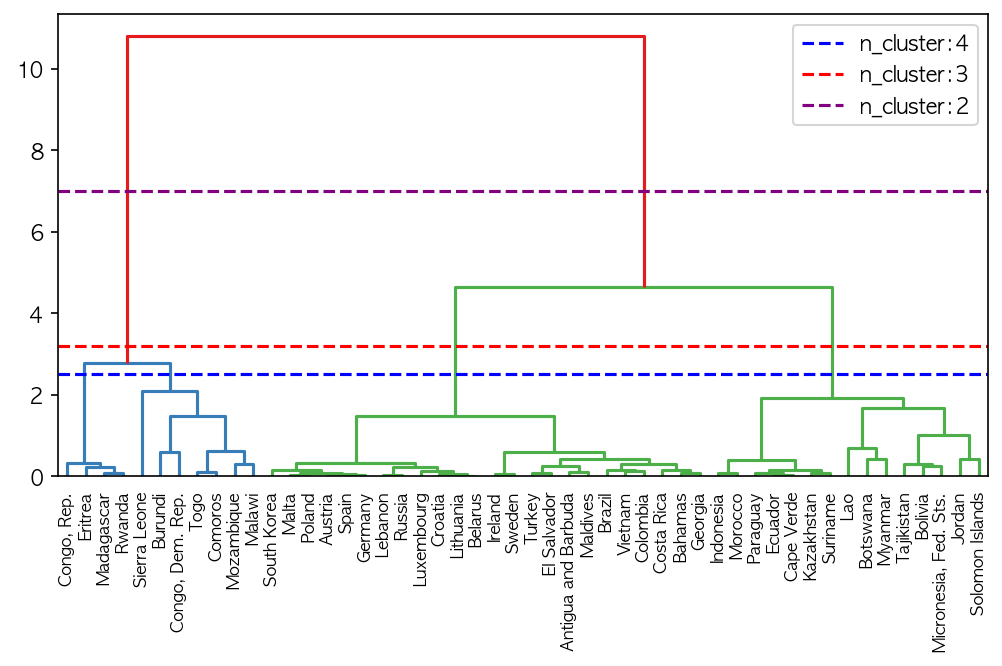

In [129]:
plt.figure(figsize = (8, 4), dpi=150)

_ = hc.dendrogram(
    hc.linkage(X, method = "ward"),
    labels=sampled_df.index.tolist()
)
plt.axhline(2.5, color = "blue", linestyle = "--", label = "n_cluster:4")
plt.axhline(3.2, color = "red", linestyle = "--", label = "n_cluster:3")
plt.axhline(7, color = "purple", linestyle = "--", label = "n_cluster:2")
plt.legend()

# Silhouette 계수 확인

In [130]:
silhouette_scores = []

for i in tqdm(range(2, 8)):
    silhouette_scores.append(
        silhouette_score(X, AgglomerativeClustering(n_clusters = i).fit_predict(X))
    )

  0%|          | 0/6 [00:00<?, ?it/s]

In [131]:
silhouette_scores

[0.6546384155897784,
 0.533574233135708,
 0.4930352679796066,
 0.5009951403854145,
 0.44848257974562616,
 0.47750620382156506]

<BarContainer object of 6 artists>

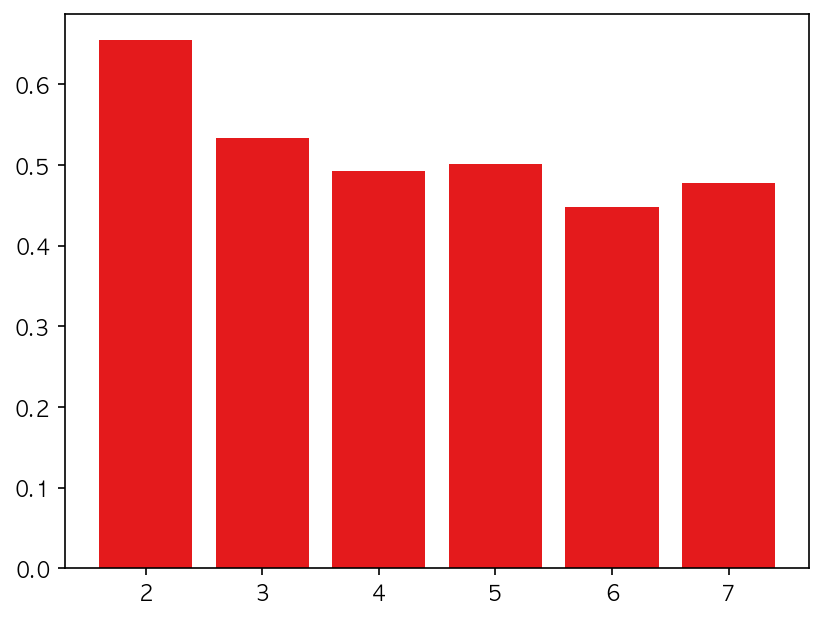

In [132]:
plt.bar(range(2, 8), silhouette_scores)

# 모델 학습

In [181]:
model = AgglomerativeClustering(n_clusters = 3, metric = "euclidean", linkage = "ward")
scaled_df["label"] = model.fit_predict(scaled_df[["child_mort", "total_fer"]])

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1493/857822213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df["label"] = model.fit_predict(scaled_df[["child_mort", "total_fer"]])


In [182]:
df["label"] = scaled_df["label"]

In [183]:
df

,child_mort,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude,exports,health,imports,label,income
country,,,,,,,,,,,,,,
Afghanistan,90.2,9.44,56.2,5.82,553.0,Southern Asia,Asia,33.939110,67.709953,55.30,41.9174,248.297,0,161.0
Albania,16.6,4.49,76.3,1.65,4090.0,Southern Europe,Europe,41.153332,20.168331,1145.20,267.8950,1987.740,2,993.0
Algeria,27.3,16.10,76.5,2.89,4460.0,Northern Africa,Africa,28.033886,1.659626,1712.64,185.9820,1400.440,1,1290.0
Angola,119.0,22.40,60.1,6.16,3530.0,Middle Africa,Africa,-11.202692,17.873887,2199.19,100.6050,1514.370,0,590.0
Antigua and Barbuda,10.3,1.44,76.8,2.13,12200.0,Caribbean,North America,17.060816,-61.796428,5551.00,735.6600,7185.800,2,1910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,2.62,63.0,3.50,2970.0,Melanesia,Oceania,-15.376706,166.959158,1384.02,155.9250,1565.190,1,295.0
Venezuela,17.1,45.90,75.4,2.47,13500.0,South America,South America,6.423750,-66.589730,3847.50,662.8500,2376.000,2,1650.0
Vietnam,23.3,12.10,73.1,1.95,1310.0,South-eastern Asia,Asia,14.058324,108.277199,943.20,89.6040,1050.620,2,449.0


In [184]:
df.groupby(["label"])["gdpp"].count()

label
0    43
1    43
2    81
Name: gdpp, dtype: int64

In [185]:
df.loc["South Korea"]

child_mort             4.1
inflation             3.16
life_expec            80.1
total_fer             1.23
gdpp               22100.0
region        Eastern Asia
continent             Asia
latitude         35.907757
longitude       127.766922
exports            10917.4
health             1531.53
imports            10210.2
label                    2
income              3040.0
Name: South Korea, dtype: object

# 군집 분석

In [186]:
tmp = []

for x in df["income"]:
    tmp.append(x / 10)

In [187]:
df.drop("income", axis = 1, inplace = True)

In [188]:
df["income"] = tmp

## 지표 확인

In [189]:
avg_df = df.groupby("label")[["income", "health"]].mean()
fer_df = scaled_df.groupby("label")[["child_mort", "total_fer"]].mean()
gdp_df = df.groupby("label")[["gdpp", "imports", "exports"]].mean()

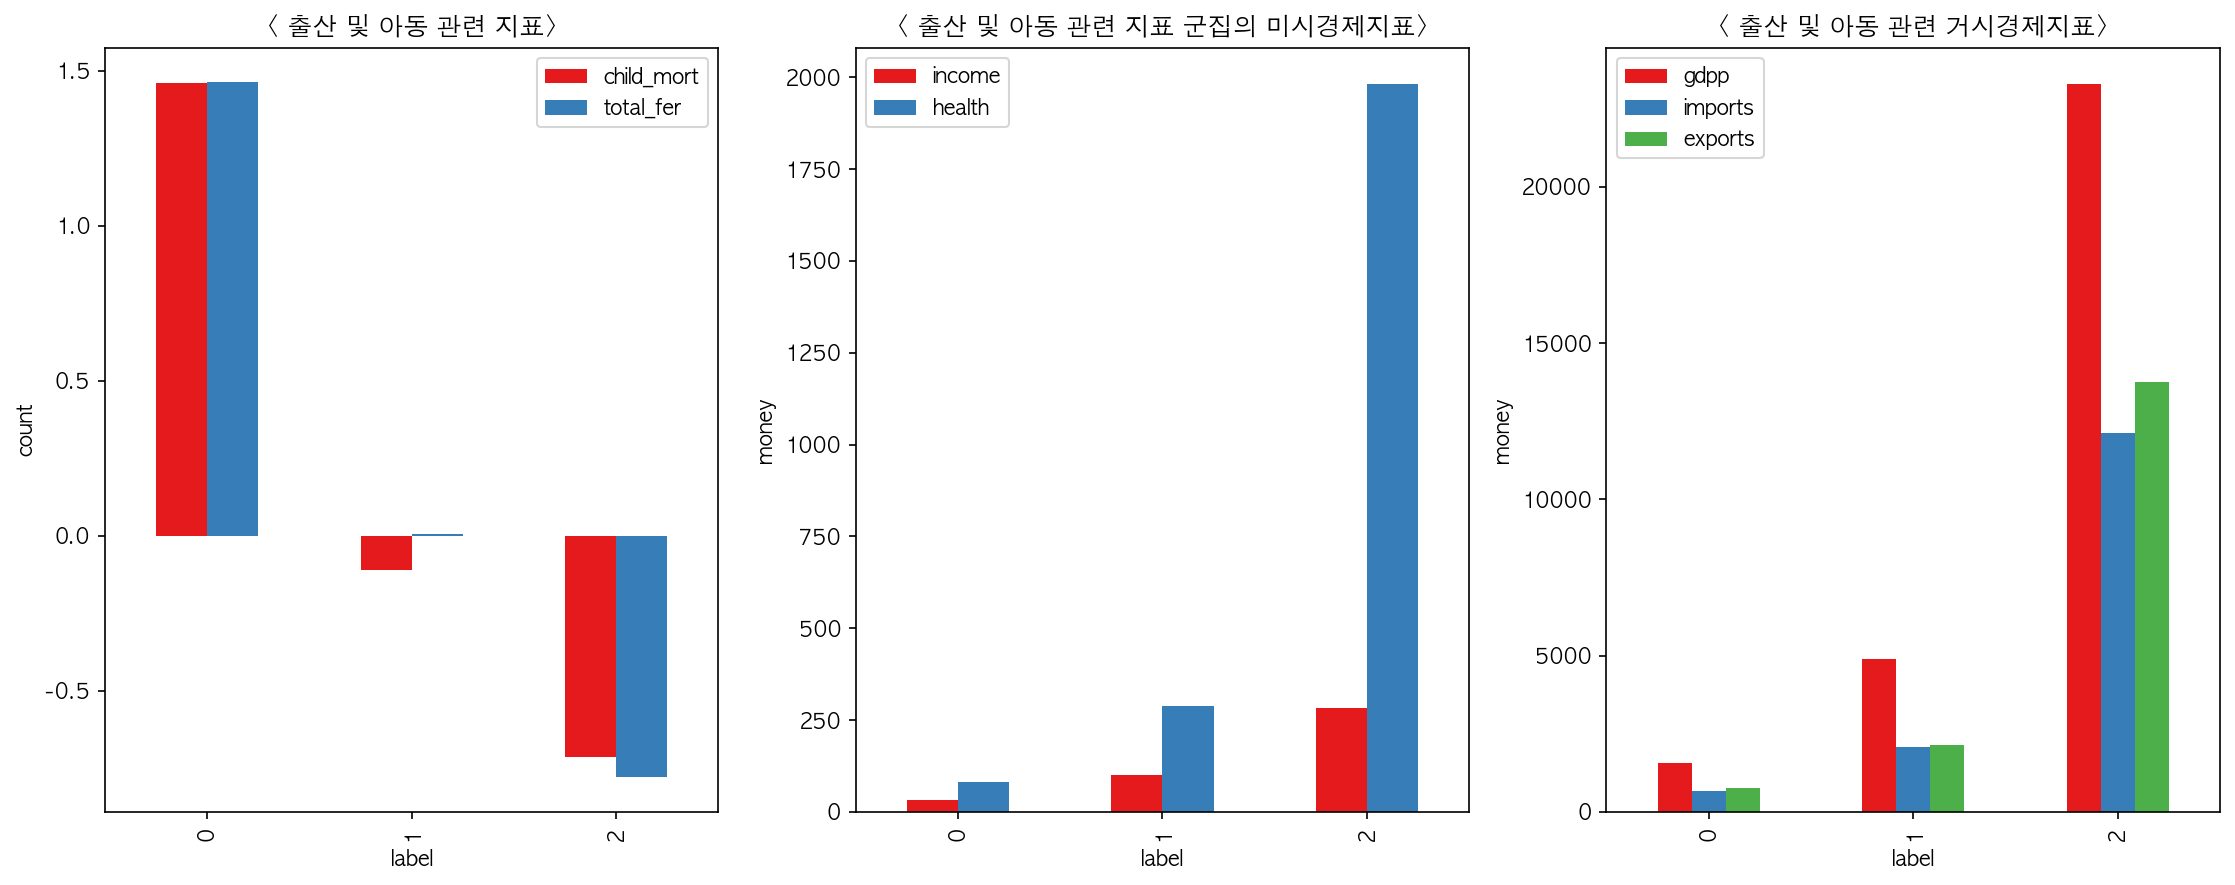

In [190]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))

fer_df.plot(kind = "bar", ax = ax1)
ax1.set_title("< 출산 및 아동 관련 지표>")
ax1.set_xlabel("label")
ax1.set_ylabel("count")

avg_df.plot(kind = "bar", ax = ax2)
ax2.set_title("< 출산 및 아동 관련 지표 군집의 미시경제지표>")
ax2.set_xlabel("label")
ax2.set_ylabel("money")

gdp_df.plot(kind = "bar", ax = ax3)
ax3.set_title("< 출산 및 아동 관련 거시경제지표>")
ax3.set_xlabel("label")
ax3.set_ylabel("money")

plt.tight_layout()

In [191]:
print("","라벨 0 평균 출산율 :", df[df["label"] == 0]["total_fer"].mean(),"\n",
      "라벨 1 평균 출산율 :", df[df["label"] == 1]["total_fer"].mean(),"\n",
      "라벨 2 평균 출산율 :",df[df["label"] == 2]["total_fer"].mean())

 라벨 0 평균 출산율 : 5.156976744186046 
 라벨 1 평균 출산율 : 2.9541860465116274 
 라벨 2 평균 출산율 : 1.771975308641975


In [192]:
print("","라벨 0 평균 아동 사망율 :", df[df["label"] == 0]["child_mort"].mean(),"\n",
      "라벨 1 평균 아동 사망율 :", df[df["label"] == 1]["child_mort"].mean(),"\n",
      "라벨 2 평균 아동 사망율 :",df[df["label"] == 2]["child_mort"].mean())

 라벨 0 평균 아동 사망율 : 96.97906976744187 
 라벨 1 평균 아동 사망율 : 33.753488372093024 
 라벨 2 평균 아동 사망율 : 9.501234567901234


/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1493/2638867039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "label" , y = t , palette = "deep", ax=axes[row, col])
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1493/2638867039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "label" , y = t , palette = "deep", ax=axes[row, col])
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1493/2638867039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "label" , y

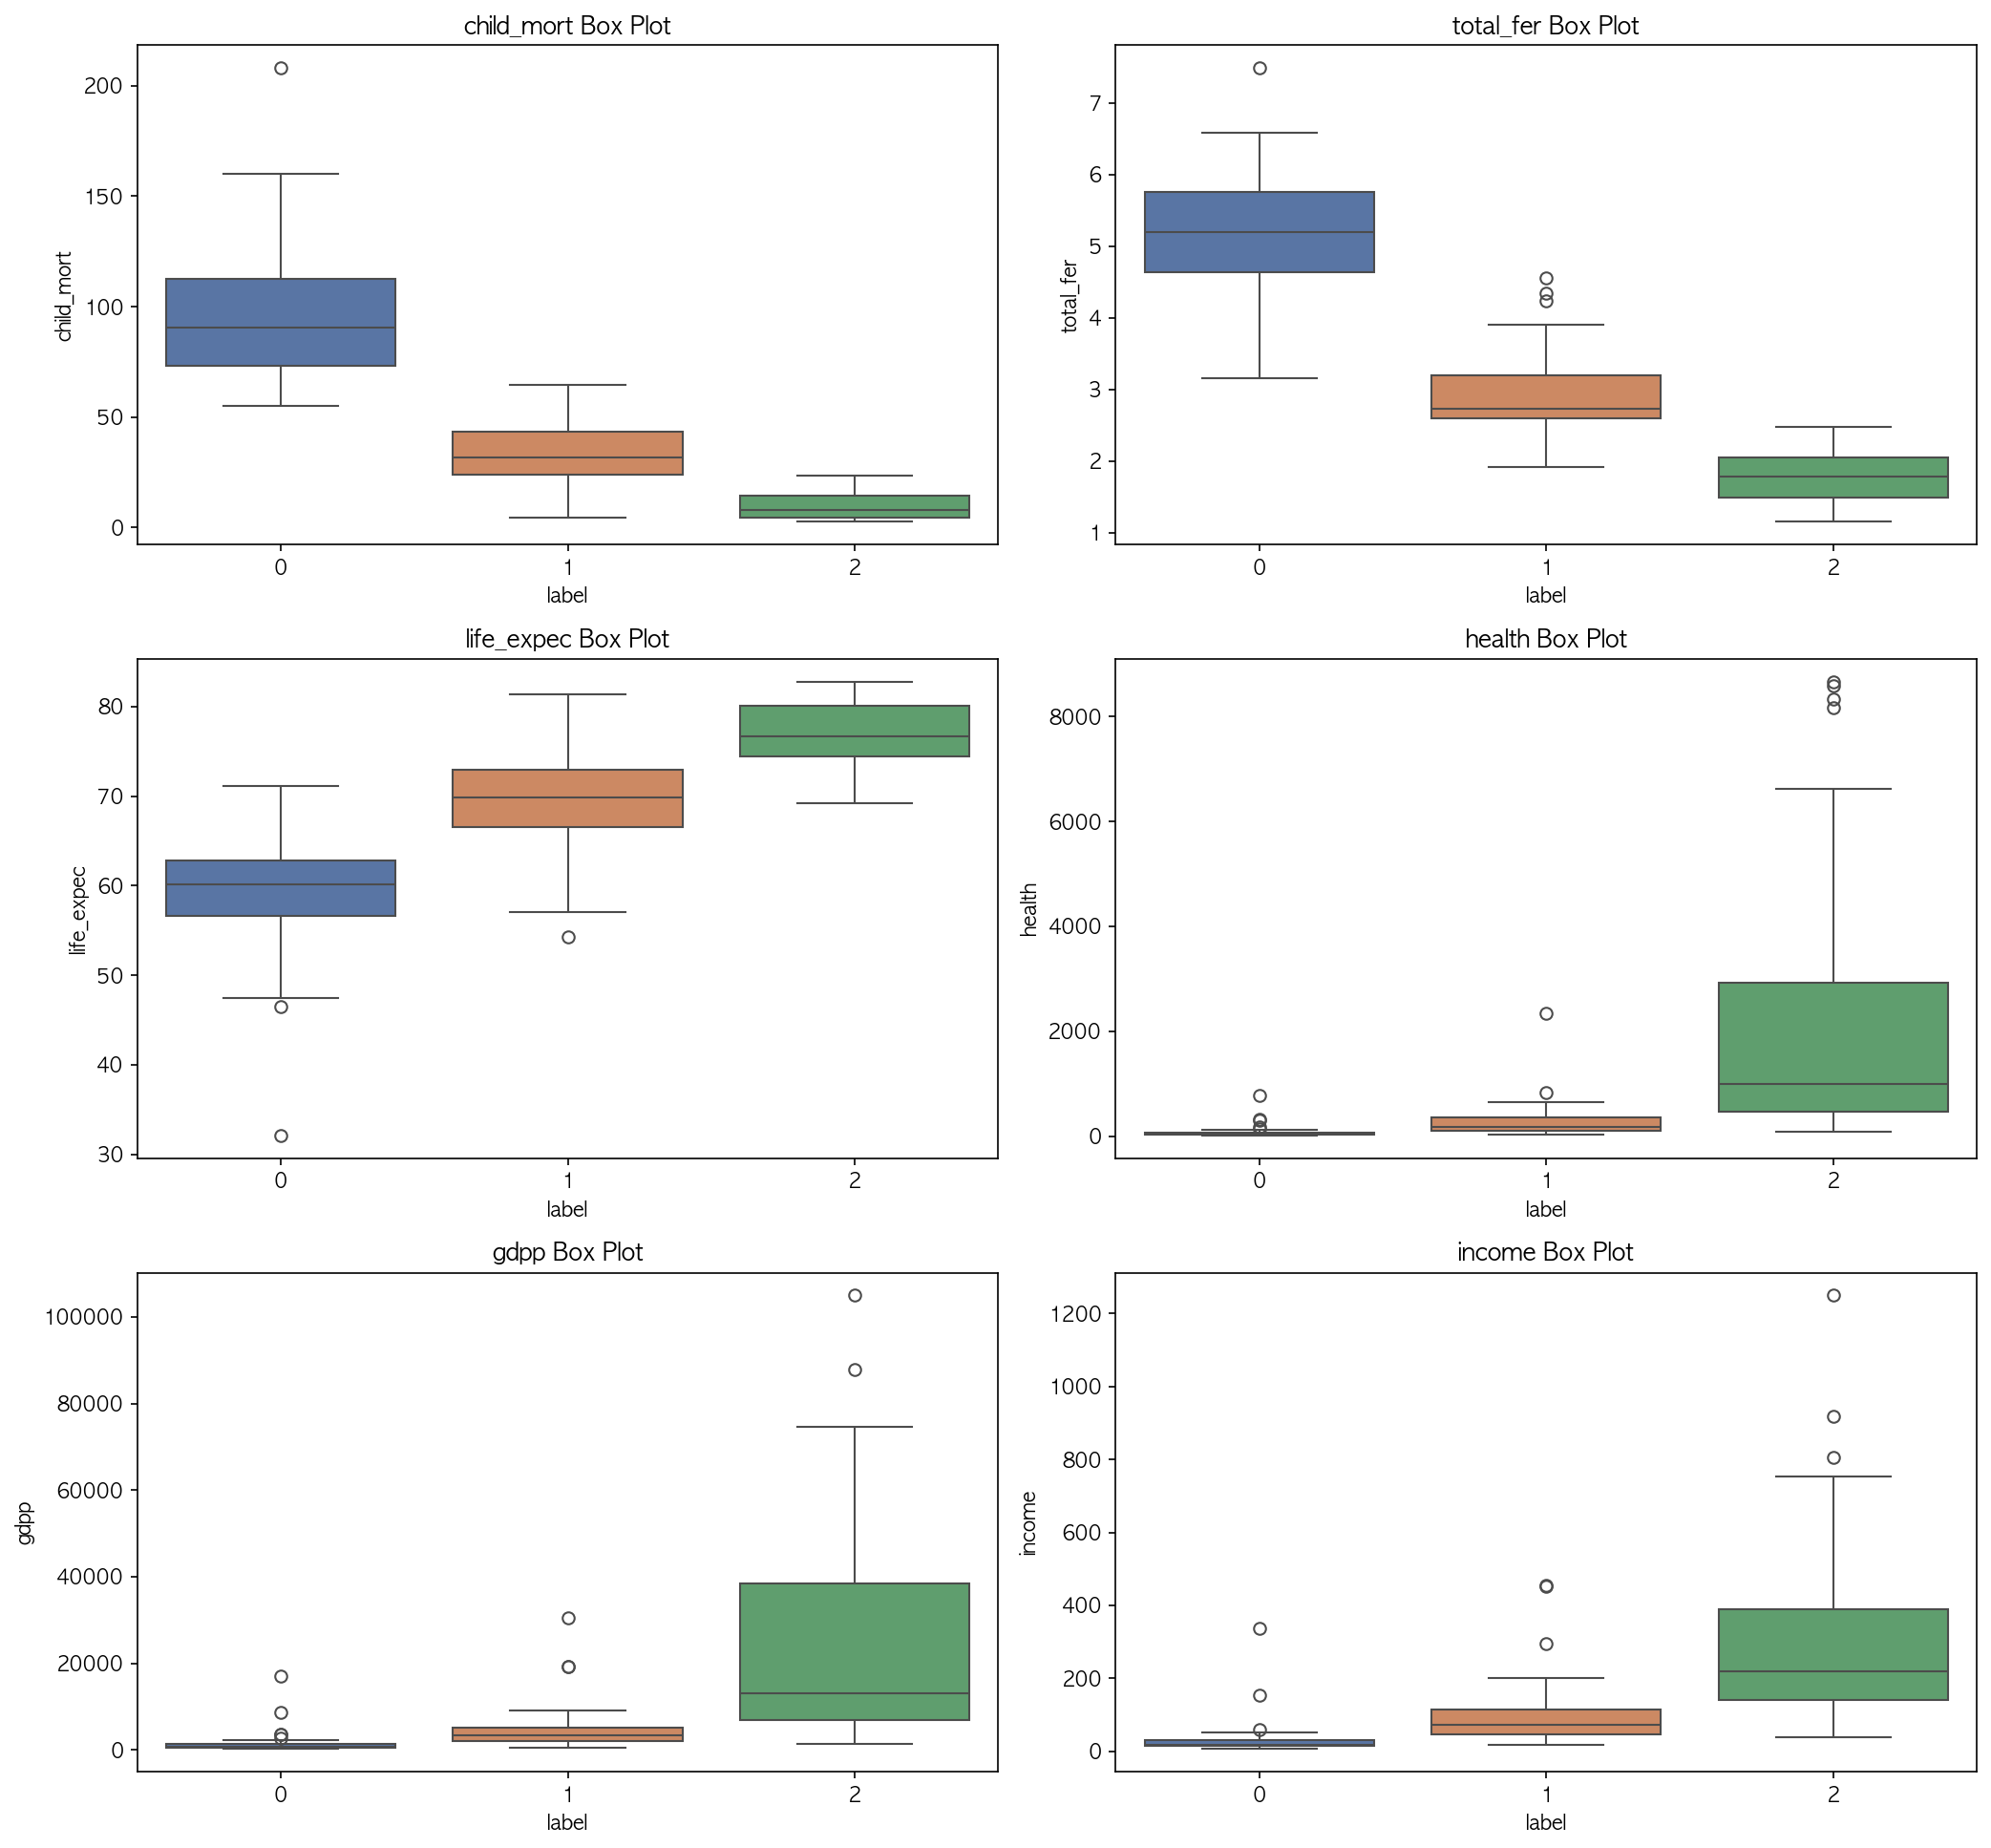

In [196]:
target = ["child_mort", "total_fer", "life_expec", "health", "gdpp", "income"]

fig, axes = plt.subplots(3, 2, figsize=(14, 13))

for i, t in enumerate(target):
    row = i // 2
    col = i % 2
    sns.boxplot(data = df, x = "label" , y = t , palette = "deep", ax=axes[row, col])
    axes[row, col].set_title(f'{t} Box Plot')
plt.tight_layout()

### child_mort 이상치 확인

In [264]:
df[(df["label"] == 0) & (df["child_mort"] > 200)]["child_mort"]

country
Haiti    208.0
Name: child_mort, dtype: float64

### total_fer 이상치 확인

In [271]:
df[(df["label"] == 0) & (df["total_fer"] > 7)]["total_fer"]

country
Niger    7.49
Name: total_fer, dtype: float64

In [284]:
df[(df["label"] == 1) & (df["total_fer"] > 4)]["total_fer"]

country
Iraq               4.56
Samoa              4.34
Solomon Islands    4.24
Name: total_fer, dtype: float64

### life_expec 이상치 확인

In [287]:
df[(df["label"] == 0) & (df["life_expec"] < 47)]["life_expec"]

country
Haiti      32.1
Lesotho    46.5
Name: life_expec, dtype: float64

In [288]:
df[(df["label"] == 1) & (df["life_expec"] < 55)]["life_expec"]

country
South Africa    54.3
Name: life_expec, dtype: float64

### health 이상치 확인

In [290]:
df[(df["label"] == 0) & (df["health"] > 200)]["health"]

country
Equatorial Guinea    766.08
Gabon                306.25
Timor-Leste          328.32
Name: health, dtype: float64

In [292]:
df[(df["label"] == 1) & (df["health"] > 800)]["health"]

country
Israel          2334.78
Saudi Arabia     827.97
Name: health, dtype: float64

In [294]:
df[(df["label"] == 2) & (df["health"] > 7000)]["health"]

country
Luxembourg       8158.50
Norway           8323.44
Switzerland      8579.00
United States    8663.60
Name: health, dtype: float64

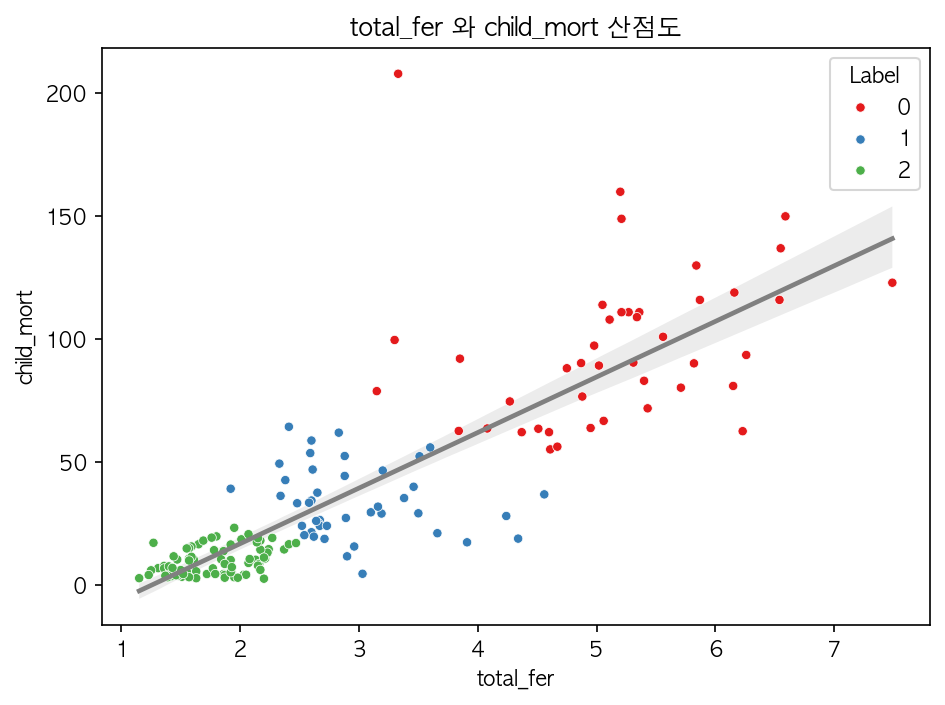

In [157]:
sns.regplot(data = df, x = df["total_fer"], y = df["child_mort"], scatter = False, color = 'grey')
sns.scatterplot(data = df, x = df["total_fer"], y = df["child_mort"], hue = 'label', palette = 'Set1', s = 20)

plt.title("total_fer 와 child_mort 산점도")
plt.legend(title = 'Label')
plt.tight_layout()

In [271]:
pd.set_option('display.max_row', None)

sorted_df = df.sort_values("child_mort", ascending = False)

In [274]:
sorted_df[:30]

,child_mort,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude,exports,health,imports,label,income
country,,,,,,,,,,,,,,
Haiti,208.0,5.450,32.1,3.33,662.0,Caribbean,North America,18.971187,-72.285215,101.2860,45.7442,428.314,0,15.00
Sierra Leone,160.0,17.200,55.0,5.20,399.0,Western Africa,Africa,8.460555,-11.779889,67.0320,52.2690,137.655,0,12.20
Chad,150.0,6.390,56.5,6.59,897.0,Middle Africa,Africa,15.454166,18.732207,330.0960,40.6341,390.195,0,19.30
Central African Republic,149.0,2.010,47.5,5.21,446.0,Middle Africa,Africa,6.611111,20.939444,52.6280,17.7508,118.190,0,8.88
Mali,137.0,4.370,59.5,6.55,708.0,Western Africa,Africa,17.570692,-3.996166,161.4240,35.2584,248.508,0,18.70
Nigeria,130.0,104.000,60.5,5.84,2330.0,Western Africa,Africa,9.081999,8.675277,589.4900,118.1310,405.420,0,51.50
Niger,123.0,2.550,58.8,7.49,348.0,Western Africa,Africa,17.607789,8.081666,77.2560,17.9568,170.868,0,8.14
Angola,119.0,22.400,60.1,6.16,3530.0,Middle Africa,Africa,-11.202692,17.873887,2199.1900,100.6050,1514.370,0,59.00
Burkina Faso,116.0,6.810,57.9,5.87,575.0,Western Africa,Africa,12.238333,-1.561593,110.4000,38.7550,170.200,0,14.30


In [275]:
26 / 30

0.8666666666666667

In [242]:
sorted_df[sorted_df["label"] == 2]["total_fer"]

country
Venezuela                         2.47
Libya                             2.41
Argentina                         2.37
El Salvador                       2.27
Grenada                           2.24
Maldives                          2.23
Kuwait                            2.21
Iceland                           2.20
Sri Lanka                         2.20
Jamaica                           2.17
New Zealand                       2.17
Seychelles                        2.17
Bahrain                           2.16
Malaysia                          2.15
Turkey                            2.15
Tunisia                           2.14
Antigua and Barbuda               2.13
Uruguay                           2.08
St. Vincent and the Grenadines    2.07
Qatar                             2.07
Ireland                           2.05
France                            2.03
Colombia                          2.01
Sweden                            1.98
Norway                            1.95
Vietnam          

In [216]:
z = Counter(df[df["label"] == 0]["continent"])
o = Counter(df[df["label"] == 1]["continent"])
t = Counter(df[df["label"] == 2]["continent"])

# for c in df[df["label"] == 2]["continent"]:
#     d[c] += 1
# print(d)
print(f"0군집 대륙 : {z}")
print(f"1군집 대륙 : {o}")
print(f"2군집 대륙 : {t}")

0군집 대륙 : Counter({'Africa': 36, 'Asia': 5, 'North America': 1, 'Oceania': 1})
1군집 대륙 : Counter({'Asia': 20, 'Africa': 7, 'South America': 6, 'Oceania': 6, 'North America': 4})
2군집 대륙 : Counter({'Europe': 39, 'Asia': 20, 'North America': 10, 'South America': 6, 'Africa': 4, 'Oceania': 2})


In [259]:
df[(df["label"] == 1)&(df["continent"] == "Asia")]

,child_mort,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude,exports,health,imports,label,income
country,,,,,,,,,,,,,,
Azerbaijan,39.2,13.80,69.1,1.92,5840.0,Western Asia,Asia,40.143105,47.576927,3171.12000,343.3920,1208.880000,1,160.0
Bangladesh,49.4,7.14,70.4,2.33,758.0,Southern Asia,Asia,23.684994,90.356331,121.28000,26.6816,165.244000,1,24.4
Bhutan,42.7,5.99,72.1,2.38,2180.0,Southern Asia,Asia,27.514162,90.433601,926.50000,113.3600,1541.260000,1,64.2
Cambodia,44.4,3.12,66.1,2.88,786.0,South-eastern Asia,Asia,12.565679,104.990963,425.22600,44.6448,467.670000,1,25.2
India,58.8,8.98,66.2,2.60,1350.0,Southern Asia,Asia,20.593684,78.962880,305.10000,54.6750,365.850000,1,44.1
Indonesia,33.3,15.30,69.9,2.48,3110.0,South-eastern Asia,Asia,-0.789275,113.921327,755.73000,81.1710,696.640000,1,84.3
Iraq,36.9,16.60,67.2,4.56,4500.0,Western Asia,Asia,33.223191,43.679291,1773.00000,378.4500,1534.500000,1,127.0
Israel,4.6,1.77,81.4,3.03,30600.0,Western Asia,Asia,31.046051,34.851612,10710.00000,2334.7800,10067.400000,1,296.0
Jordan,21.1,8.43,75.8,3.66,3680.0,Western Asia,Asia,30.585164,36.238414,1777.44000,295.8720,2539.200000,1,94.7


In [197]:
df[(df["child_mort"] > 200) & (df["total_fer"] > 3)]

,child_mort,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude,exports,health,imports,label,income
country,,,,,,,,,,,,,,
Haiti,208.0,5.45,32.1,3.33,662.0,Caribbean,North America,18.971187,-72.285215,101.286,45.7442,428.314,0,15.0


In [266]:
df[df["label"] == 0]

,child_mort,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude,exports,health,imports,label,income
country,,,,,,,,,,,,,,
Afghanistan,90.2,9.440,56.2,5.82,553.0,Southern Asia,Asia,33.939110,67.709953,55.3000,41.9174,248.297,0,16.10
Angola,119.0,22.400,60.1,6.16,3530.0,Middle Africa,Africa,-11.202692,17.873887,2199.1900,100.6050,1514.370,0,59.00
Benin,111.0,0.885,61.8,5.36,758.0,Western Africa,Africa,9.307690,2.315834,180.4040,31.0780,281.976,0,18.20
Burkina Faso,116.0,6.810,57.9,5.87,575.0,Western Africa,Africa,12.238333,-1.561593,110.4000,38.7550,170.200,0,14.30
Burundi,93.6,12.300,57.7,6.26,231.0,Eastern Africa,Africa,-3.373056,29.918886,20.6052,26.7960,90.552,0,7.64
Cameroon,108.0,1.910,57.3,5.11,1310.0,Middle Africa,Africa,7.369722,12.354722,290.8200,67.2030,353.700,0,26.60
Central African Republic,149.0,2.010,47.5,5.21,446.0,Middle Africa,Africa,6.611111,20.939444,52.6280,17.7508,118.190,0,8.88
Chad,150.0,6.390,56.5,6.59,897.0,Middle Africa,Africa,15.454166,18.732207,330.0960,40.6341,390.195,0,19.30
Comoros,88.2,3.870,65.9,4.75,769.0,Eastern Africa,Africa,-11.875001,43.872219,126.8850,34.6819,397.573,0,14.10
